## Crawling 시험 답안지(Crawling submission) 안내
- 파일명에 본인 성명 기입하시오(Enter your name in the file name.)
- 수업 중 배웠던 내용을 상기하여 최선을 다해 문제 풀어주세요.(Recall what you learned in class and do your best to solve the problem.)

## 이론형

Question 1. 다음 아래의 문제를 읽고 답을 서술하시오. 
 - 문제1) 다음은 빅데이터 수집방식에 대한 설명이다. 빈 칸에 알맞은 방식을 고르시오.

In [ ]:
#  ➀ - a. 로그수집
#  ➁ - f. 크롤링
#  ➂ - c. 오픈API
#  ④ - h. 센서 수집

 - 문제2) 크롤링의 개념과 필요성에 대해 서술하시오.

In [ ]:
크롤링 개념 - 웹페이지의 내용을 수집하는 것
필요성 - 웹페이지에 있는 다양한 데이터들을 사람이 매번 직접 손으로 
수집하기가 어렵기때문에 작업을 자동으로 해주는 프로그램이 필요하기 때문

 - 문제3)  BeautifulSoup모듈에 대해 서술하시오.

In [ ]:
웹 문서안에 있는 데이터를 추출할 수 있도록 함수를 제공해주는 라이브러리

 - 문제4) 다음 두 보기의 차이를 설명하시오.

In [ ]:
#  ➀ find_element(By.CSS_SELECTOR) : 특정 css 선택자 1개만 접근한다.

#   ➁ find_elements(By.CSS_SELECTOR) : 동일한 css선택자 여러개를 접근한다.

 - 문제5) 다음은 HTML코드로 이루어진 웹 페이지이다. 밑줄 그어진 부분을 BeautifulSoup모듈의 함수를 이용하여 텍스트만 수집할 수 있는 코드를 빈칸에 작성하시오.
 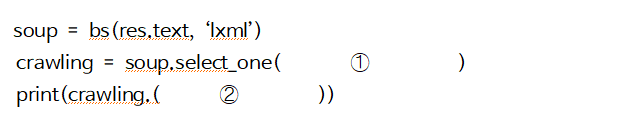

In [ ]:
#  ➀ '#this_span'
#  ➁ text

----

## 실습형

Question 2. 다음 문제를 읽고 알맞은 코드를 작성하시오.
 - 문제2)  자동제어를 통해 네이버 홈페이지에 접속하고 ‘크롤링’를 입력하여 검색하는 수집시스템을 구축하시오.  
        * 페이지주소: https://www.naver.com/ 
        * 현재 주소에 띄워진 데이터를 수집하세요 (아래 이미지와 다를수있습니다)

In [ ]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

url = ' https://www.naver.com/'
driver = wb.Chrome()
driver.get(url)

driver.find_element(By.CSS_SELECTOR, value='#query').send_keys('크롤링\n')

----

Question 3. 다음 문제를 읽고 알맞은 코드를 작성하시오.
 - 문제3) 자동제어를 통해 G마켓 홈페이지에 접속하고, 조건에 맞는 수집프로그램을 만드시오.
        * 페이지주소: http://corners.gmarket.co.kr/Bestsellers 
        * 현재 주소에 띄워진 데이터를 수집하세요 (아래 이미지와 다를 수 있습니다)

In [ ]:
# 1. G마켓 Best 1~20위까지 제목과 가격을 수집하는 프로그램을 만드시오.
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pandas as pd

url = 'http://corners.gmarket.co.kr/Bestsellers'
driver = wb.Chrome()
driver.get(url)

pro_lst = []
price_lst = []

for i in range(1,21):
    number = driver.find_elements(By.CSS_SELECTOR, value=f'p#no{i}')
#     for i in number:
#         print(i.text)
    product = driver.find_elements(By.CSS_SELECTOR, value=f'div.best-list>ul>li#itemidx{i}>a')
    product
    price = driver.find_elements(By.CSS_SELECTOR, value=f'li#itemidx{i}>div.item_price>div.s-price>strong>span')
    for i in range(len(product)):
        pro_lst.append(product[i].text)
        price_lst.append(price[i].text)
# print(pro_lst)
# print(price_lst)
    

    

In [ ]:
# 2. 수집한 데이터를 DataFrame으로 만드시오.
pro_dic = {'상품명' : pro_lst, '가격' : price_lst}
pro_dic
pro_df = pd.DataFrame(pro_dic)
pro_df


----

Question 4. 다음 문제를 읽고 알맞은 코드를 작성하시오.
 - 문제4) 멜론차트에서 1~100위까지 정보를 수집하는 프로그램을 작성하시오.
        * 페이지주소: https://www.melon.com/chart/ 
        * 현재 주소에 띄워진 데이터를 수집하세요 (아래 이미지와 다를수있습니다)
        
    <조건>
     1. 수집할 정보는 곡정보에 있는 곡명과 가수명 이다.
     2. pandas의 DataFrame형태로 ‘순위’를 기준으로 결과를 출력하여야 한다.
     3. csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다.  
       ※ 순위는 생성해야 한다.  
       ※ csv파일은 제출할 필요가 없다(코드만 작성)

In [ ]:
# 수집할 정보는 곡정보에 있는 곡명과 가수명 이다.
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs

header = {'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
url = 'https://www.melon.com/chart/'
res = req.get(url, headers = header)
res
html = bs(res.text, 'lxml')
html
sing_lst = []
singer_lst = []
rank_lst = []

sing = html.select('div.ellipsis.rank01>span>a')
sing
singer = html.select('div.ellipsis.rank02>a:first-child')
singer
for i in range(len(sing)):
    rank_lst.append(i+1)
    sing_lst.append(sing[i].text.strip())
    singer_lst.append(singer[i].text.strip())

In [ ]:
# pandas의 DataFrame형태로 ‘순위’를 기준으로 결과를 출력하여야 한다.
melon_dic = {'순위' : rank_lst, '곡명' : sing_lst, '가수명' : singer_lst}
melon_dic
melon_df = pd.DataFrame(melon_dic)
melon_df2 = melon_df.set_index('순위')
melon_df2

In [ ]:
# csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다.
melon_df2.to_csv('melonTop100.csv', encoding = 'utf-8-sig')

----

Question 5. 다음 문제를 읽고 알맞은 코드를 작성하시오.
 - 문제5) 자동제어를 통해 한솥 페이지에 접속하고 전체 메뉴의 메뉴명 가격정보를 수집할 수 있는 프로그램을 작성하세요. 
    * 페이지주소: https://www.hsd.co.kr/menu/menu_list
    * 현재 주소에 띄워진 데이터를 수집하세요. (아래 이미지와 다를 수 있습니다)
        
    <조건>
       1. 수집할 정보는 전체 메뉴의 메뉴명, 가격정보 이다.
       2. pandas의 DataFrame형태로 결과를 출력하여야 한다.
       3. csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다.  
        ※ 코드를 실행했을 때 더보기 버튼을 끝까지 누른 후 정보를 수집해야 한다.  
        ※ csv파일은 제출할 필요가 없다.(코드만 작성)  

In [ ]:
# 수집할 정보는 전체 메뉴의 메뉴명, 가격정보 이다.
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

url = 'https://www.hsd.co.kr/menu/menu_list'
driver = wb.Chrome()
driver.get(url)
the_btn = driver.find_element(By.CSS_SELECTOR, value='.c_05')
try:
    while True : 
        the_btn.click()
        time.sleep(1)
except:
    print("더보기 클릭 완료!!")
    
menu = driver.find_elements(By.CSS_SELECTOR, value = 'div.item-spacer >div.item-text>h4')
price = driver.find_elements(By.CSS_SELECTOR, value = 'div.item-spacer >div.item-text>div.item-price>strong')

menu_lst = []
price_lst = []
for i in range(len(menu)):
    menu_lst.append(menu[i].text.strip())
    price_lst.append(price[i].text.strip())
print(menu_lst)
print(price_lst)

In [ ]:
# pandas의 DataFrame형태로 결과를 출력하여야 한다.
menu_dic = {'메뉴명' : menu_lst, '가격' : price_lst}
menu_df = pd.DataFrame(menu_dic)
menu_df

In [ ]:
# csv파일로 한글이 깨지지 않게 저장할 수 있는 코드를 작성하여야 한다.
menu_df.to_csv('hansod_menu.csv', encoding = 'utf-8-sig')